* Python version used is 3.7.6

*Given is the ‘Portugal Bank Marketing’ dataset:* 

 ### **Bank client data:**
 ------------

 
1) **age** (numeric)   
 
2) **job**: type of job(categorical:"admin.","bluecollar","entrepreneur","housemaid","management","retired"  
            "self-employed","services","student","technician","unemployed","unknown")  
 
3) **marital**: marital status (categorical: "divorced","married","single","unknown"; note: "divorced"  
                means divorced or widowed)   
 
4) **education**: education of individual (categorical:"basic.4y","basic.6y","basic.9y","high.school"  
                  "illiterate","professional.course","university.degree","unknown") 
 
5) **default**: has credit in default? (categorical: "no","yes","unknown") 
 
6) **housing**: has housing loan? (categorical: "no","yes","unknown") 
 
7) **loan**: has personal loan? (categorical: "no","yes","unknown") 
 
#### **Related with the last contact of the current campaign:**

------------------  

8) **contact**: contact communication type (categorical: "cellular","telephone") 
 
9) **month**: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec") 
 
10) **dayofweek**: last contact day of the week (categorical: "mon","tue","wed","thu","fri") 
 
11) **duration**: last contact duration, in seconds (numeric). Important note: this attribute highly 
affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call 
is performed. Also, after the end of the call y is obviously known. Thus, this input should only be 
included for benchmark purposes and should be discarded if the intention is to have a realistic 
predictive model. 
 
#### **Other attributes:**

--------------------

12) **campaign**: number of contacts performed during this campaign and for this client (numeric, 
includes last contact) 
 
13) **pdays**: number of days that passed by after the client was last contacted from a previous 
campaign (numeric; 999 means client was not previously contacted) 
 
14) **previous**: number of contacts performed before this campaign and for this client (numeric) 
 
15) **poutcome**: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success") 
 
Social and economic context attributes:  

16) **emp.var.rate**: employment variation rate - quarterly indicator (numeric) 
 
17) **cons.price.idx**: consumer price index - monthly indicator (numeric) 
 
18) **cons.conf.idx**: consumer confidence index - monthly indicator (numeric) 
 
19) **concavepoints_se**: standard error for number of concave portions of the contour 
 
20) **euribor3m**: euribor 3 month rate - daily indicator (numeric) 
 
21) **nr.employed**: number of employees - quarterly indicator (numeric)  

#### **Output variable (desired target):**

--------------------

22) **y**: has the client subscribed a term deposit? (binary: "yes","no")

**Importing the required packages**

In [ ]:
import warnings
warnings.filterwarnings("ignore") # to ignore the red text boxes displayed in an output.
import pandas as pd # for creating a pandas dataframe from the given csv file.
import numpy as np  # for working with arrays.
import matplotlib.pyplot as plt # Matplotlib and seaborn are used for visualizations.
import seaborn as sns

#importing the metrics to evaluate the models
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# importing the models that we are going to use
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Extra imports
from pandas.api.types import is_string_dtype 

In [ ]:
#!pip freeze > requirements.txt

**Reading in the data file**

In [ ]:
bank_df = pd.read_csv(r'bank.csv',delimiter=";")

In [ ]:
# for a view of the first 5 rows of the data
bank_df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


- From the 10 rows displayed, we can see that quite a lot of columns lack variety, but we'll do further analysis to truly see the variation of values in the variables.

**Preliminary analysis of the data to understand the dataset**

In [ ]:
# Checking the shape of the Dataframe
bank_df.shape

(41188, 21)

In [ ]:
# Checking the Datatypes of the variables
bank_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [ ]:
# Stats of the Dataset
bank_df.describe().T #(.T == "transpose")

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


- As can be seen, most variables seem to be okay, with no obvious outliers, and analomies. 
- two variables that do stick out are "duration" and "campaign". Duration's max values seems to be a likely outlier, and so does "campaigns". However before we make any decision, we'll check, later on, whether these outlieers are likely to affect the model or not.

### **Primary Analysis of the Categorical Features**

In [ ]:
bank_df.describe(include='O') # The parametere is passed only to include object datatypes

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


**Subsetting the categorical columns in the Dataframe**

In [ ]:
cat_col=[col for col in bank_df.columns.values if bank_df[col].dtype=='object']
cat_col

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [ ]:
# Creating a Dataframe of the Categorical colums

df_cat=bank_df[cat_col]
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


**Value counts for each of the categorical columns**

In [ ]:
for x in cat_col:
    print("\t",x)
    print(df_cat[x].value_counts())
    print("\n","*"*50)

	 job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

 **************************************************
	 marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

 **************************************************
	 education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

 **************************************************
	 default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64

 **************************************************
	 housing

**Countplots of the categorical variables**

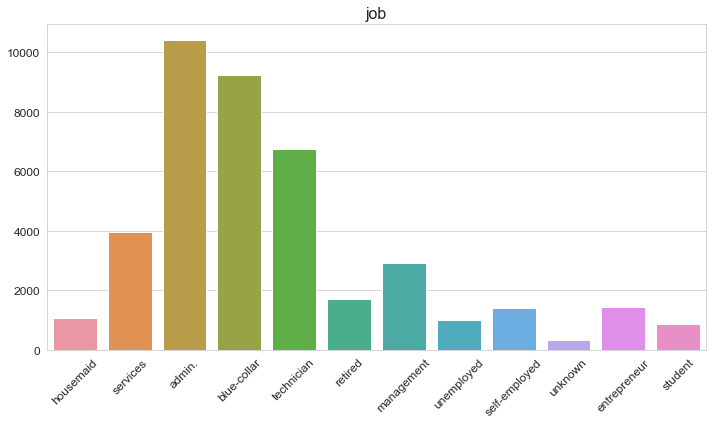


 ******************************************************************************************************************************************************


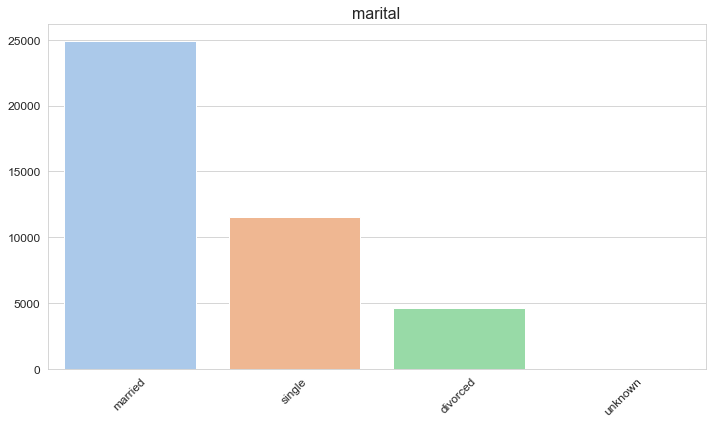


 ******************************************************************************************************************************************************


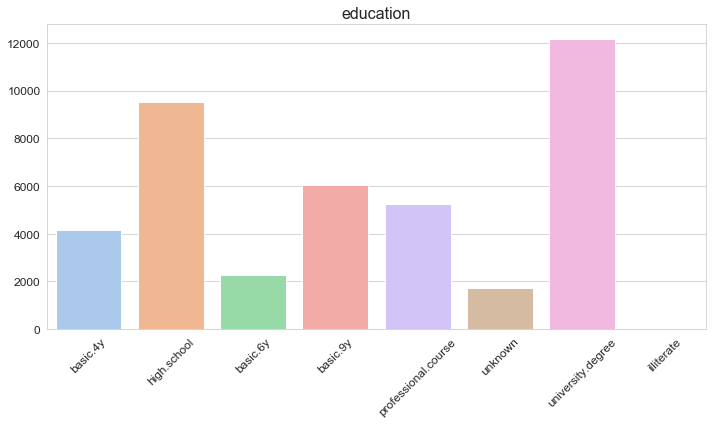


 ******************************************************************************************************************************************************


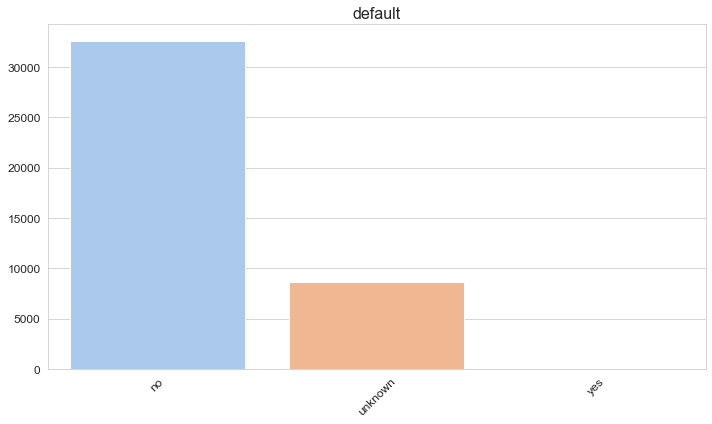


 ******************************************************************************************************************************************************


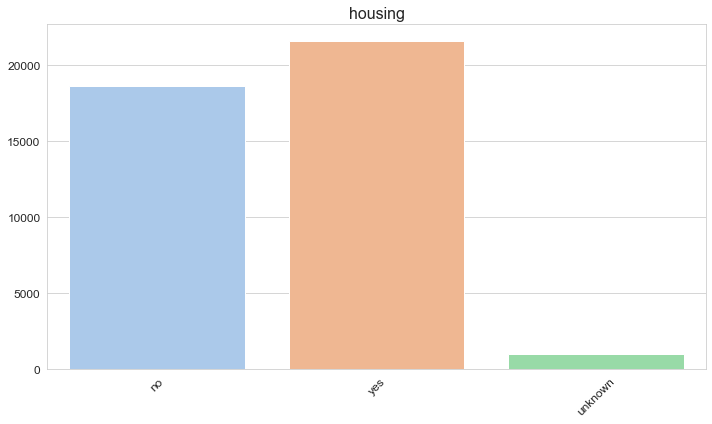


 ******************************************************************************************************************************************************


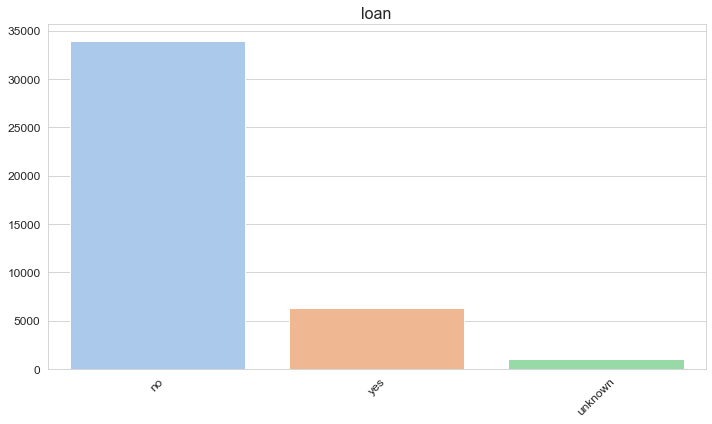


 ******************************************************************************************************************************************************


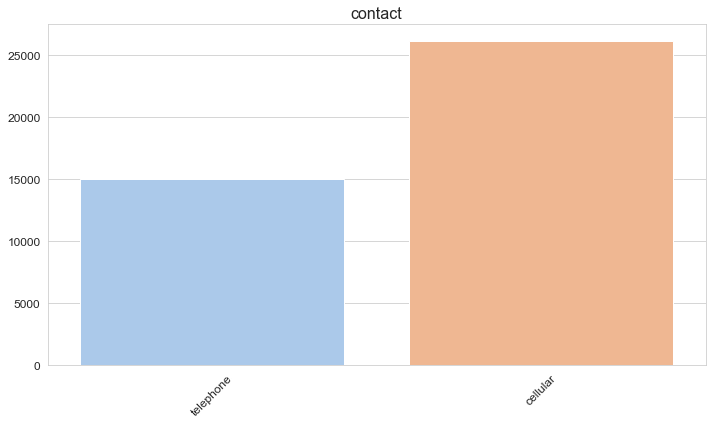


 ******************************************************************************************************************************************************


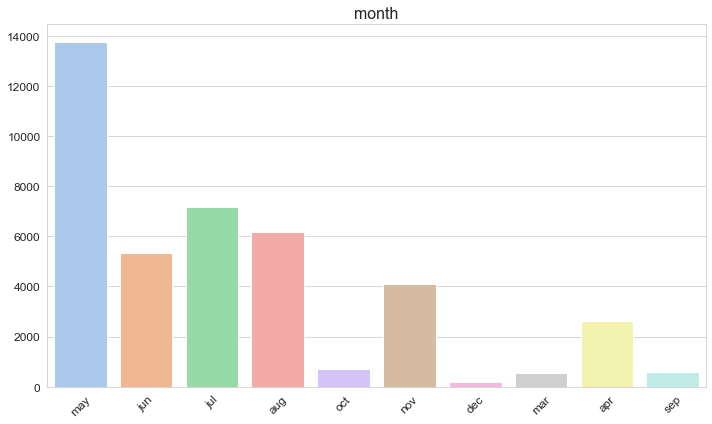


 ******************************************************************************************************************************************************


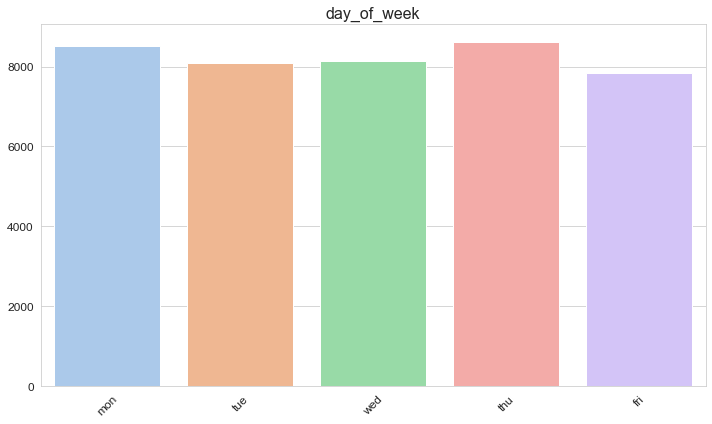


 ******************************************************************************************************************************************************


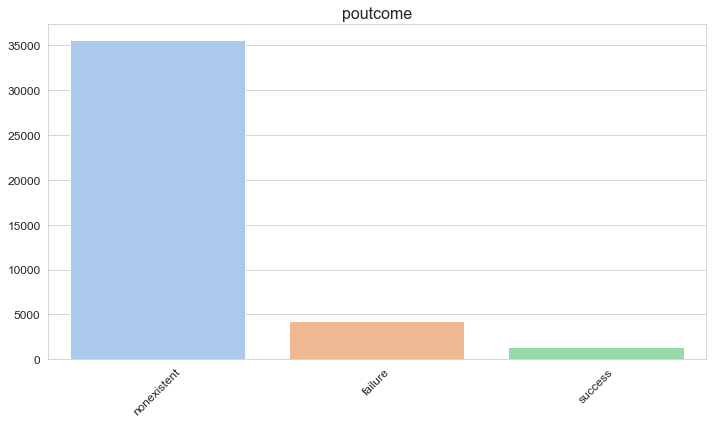


 ******************************************************************************************************************************************************


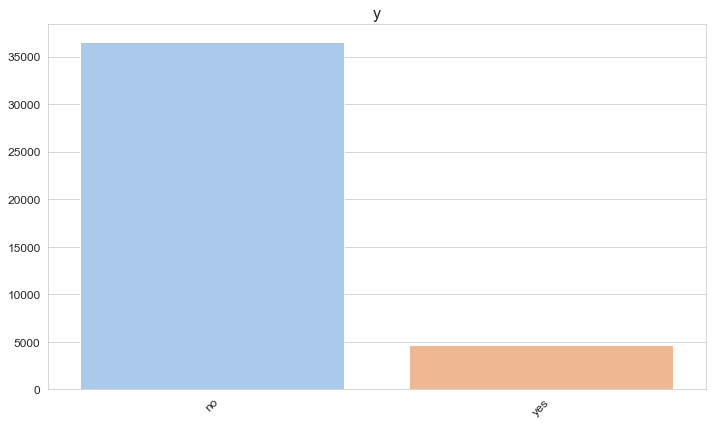


 ******************************************************************************************************************************************************


In [ ]:
for x in cat_col:
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.countplot(df_cat[x], ax=ax)
    ax.set_title(x, fontsize=16)
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.tick_params(axis='x', rotation=45)
    plt.tight_layout()
    plt.show()
    print("\n", "*" * 150)


**Here I have combined all the plots into a single plot for easy analysis**

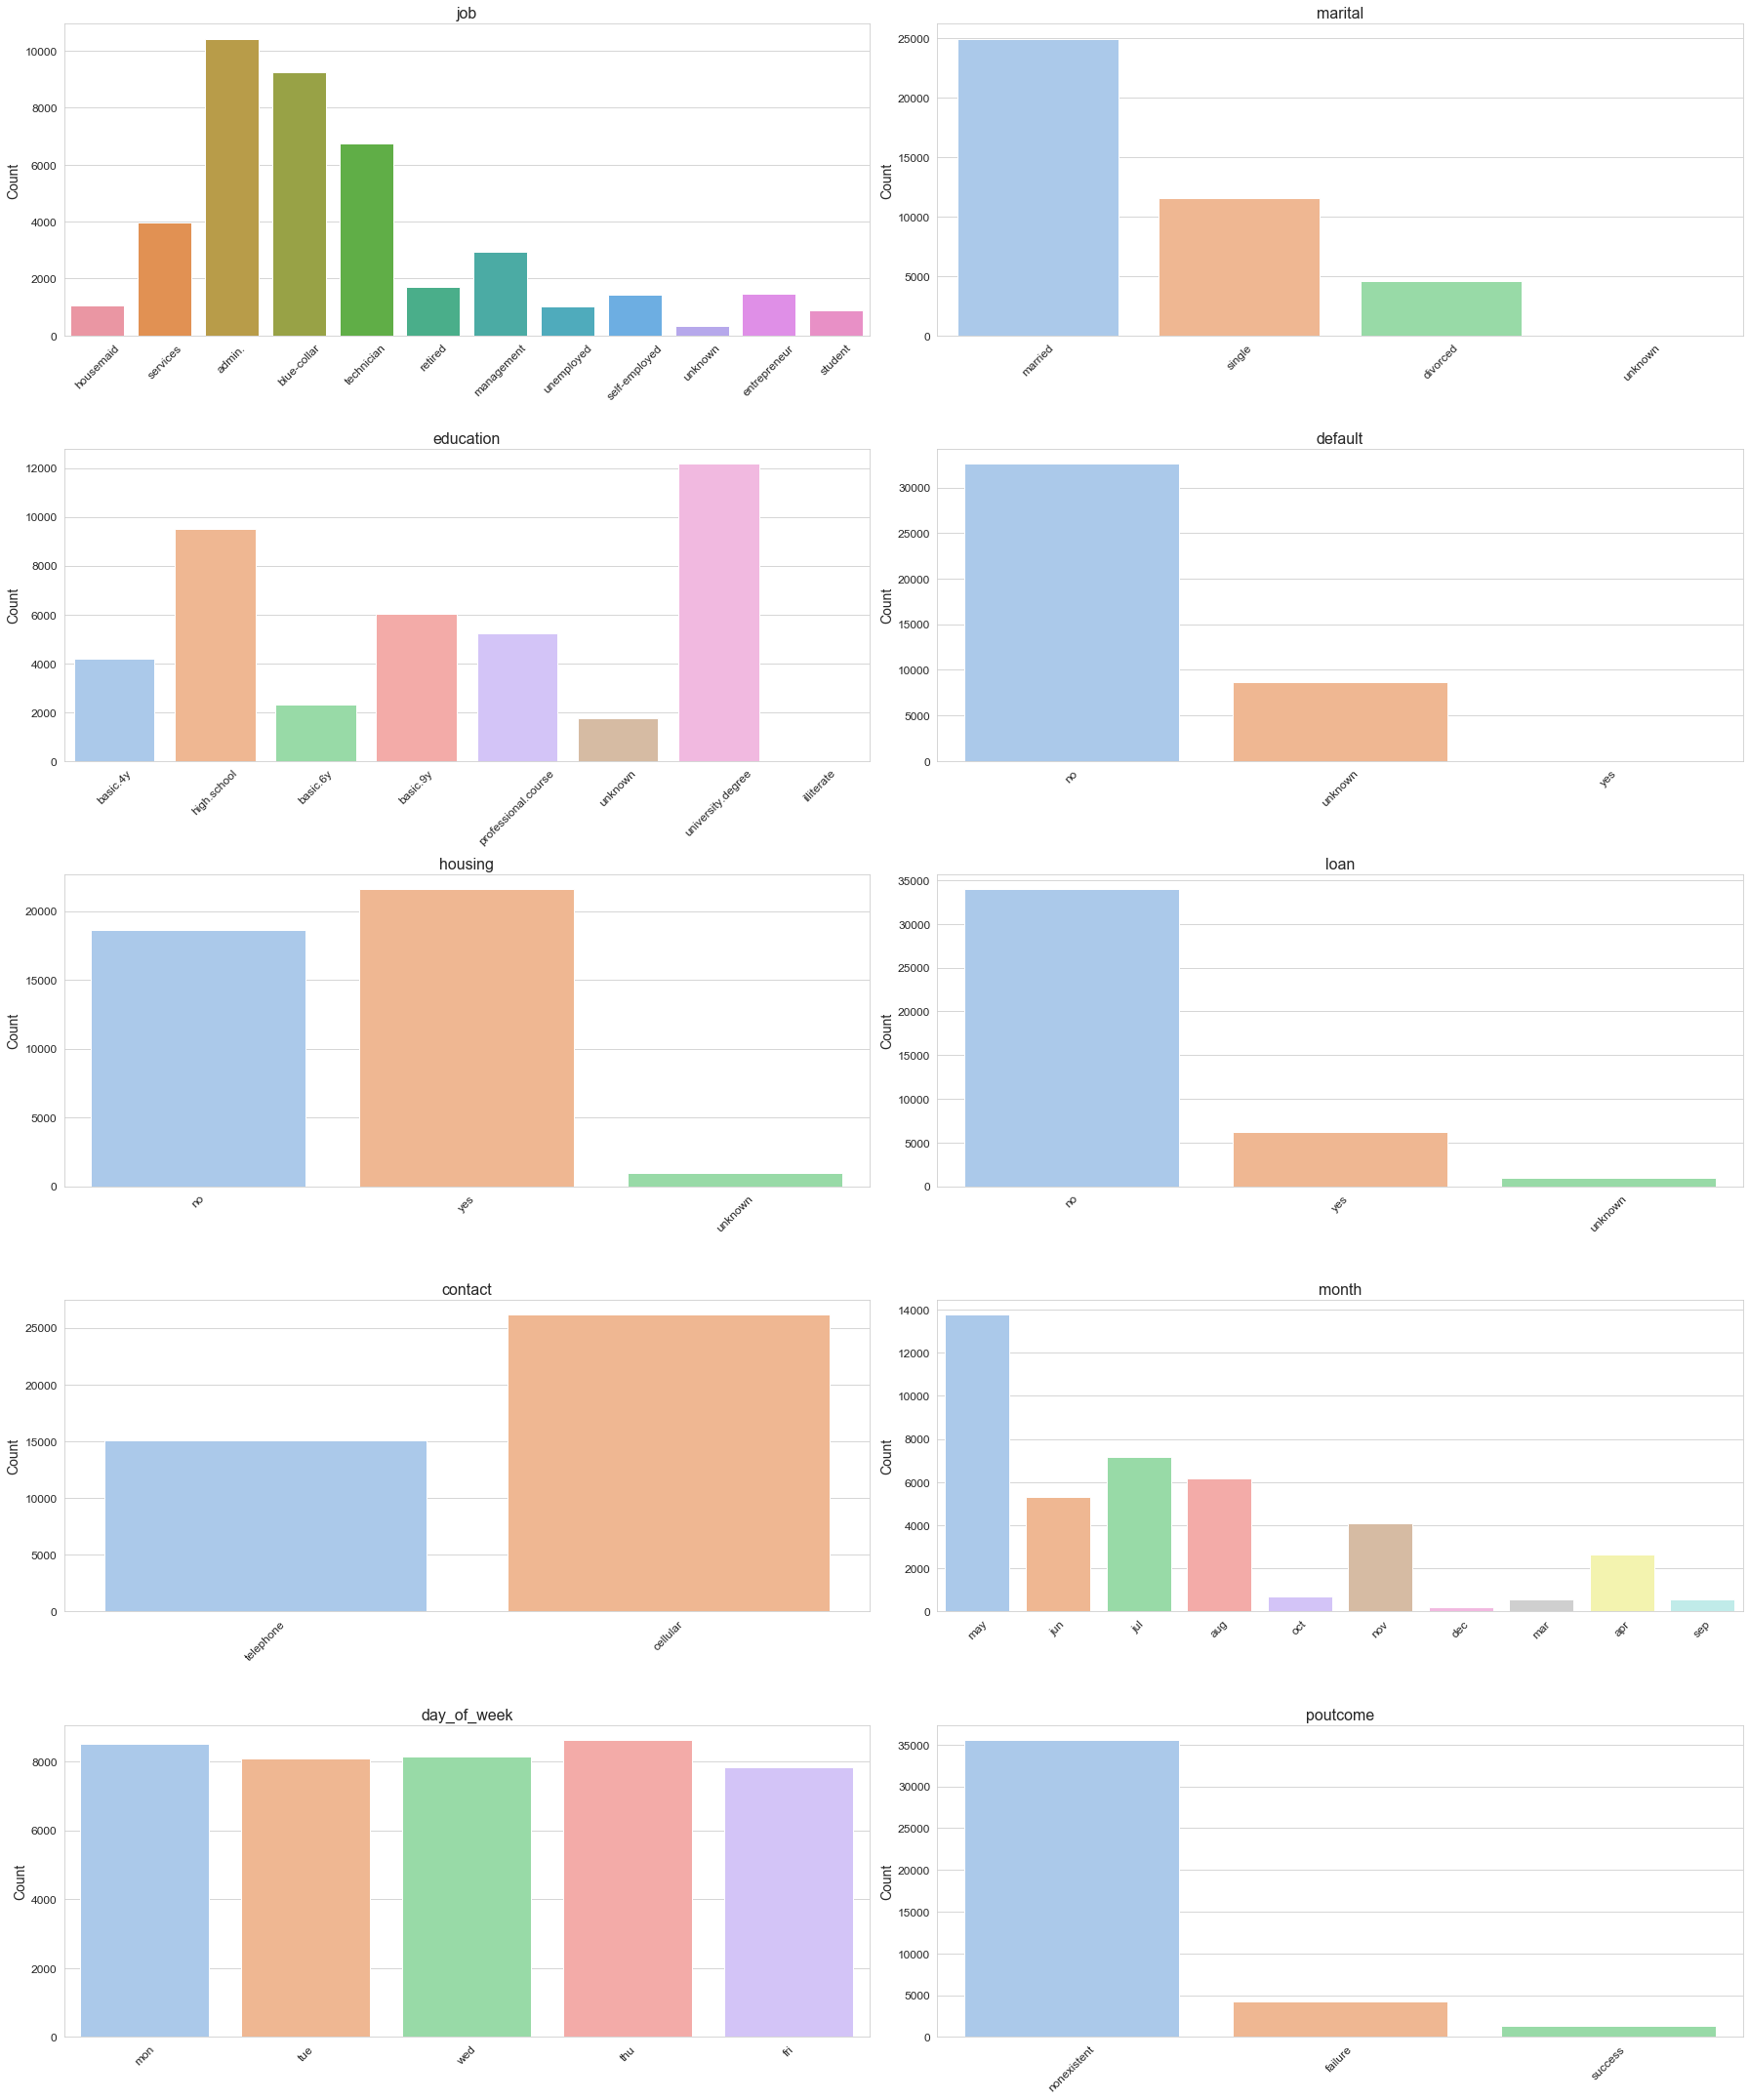

In [ ]:
# create a list of categorical variables
categorical = [column for column in bank_df.columns if is_string_dtype(bank_df[column])]

# set the color palette for the count plots
sns.set_palette('pastel')

# plot count plots of the categorical variables
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(25, 30))
for variable, subplot in zip(categorical, ax.flatten()):
    sns.countplot(bank_df[variable], ax=subplot)
    subplot.set_title(variable, fontsize=16)
    subplot.set_xlabel(None)
    subplot.set_ylabel('Count', fontsize=14)
    subplot.tick_params(axis='both', which='major', labelsize=12)
    subplot.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()


### **Observations based on the count plots:**

- Job: The majority of bank clients are from admin, blue-collar, and technician professions. There are also a significant number of clients who are retired and self-employed.

- Marital status: Most clients are married, followed by clients who are single or in a partnership.

- Education: Almost all clients have completed secondary or higher education, with a significant number of clients having a university degree.

- Default: The majority of clients do not have a history of defaulting on credit.

- Housing loan: Most clients do not have a housing loan.

- Personal loan: Most clients do not have a personal loan.

- Contact: There are a mix of clients who use telephone and cellular as their primary means of contact with the bank.

- Month: Most term deposits are opened in May, followed by the months of July, August, and June.

- Day of week: There are a roughly equal number of term deposits opened on each day of the week, with slightly more on Monday and Thursday.

- Outcome (target variable): The dataset is imbalanced, with a majority of clients not subscribing to the term deposit.


**Countplot of the target variable**

In [ ]:
bank_df.y.value_counts()

no     36548
yes     4640
Name: y, dtype: int64

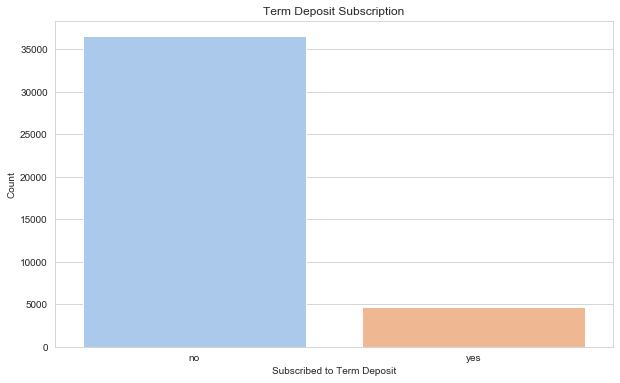

In [ ]:
# Create a count plot of the target variable
sns.set_style("whitegrid")  # set the style of the plot
plt.figure(figsize=(10,6))  # set the figure size
sns.countplot(bank_df.y, palette="pastel")  # create the count plot with a pastel color palette
plt.title("Term Deposit Subscription")  # set the title of the plot
plt.xlabel("Subscribed to Term Deposit")  # set the label for the x-axis
plt.ylabel("Count")  # set the label for the y-axis
plt.show()  # display the plot

*From the count plot of the target variable **bank_df.y**, we can see that the majority of the bank clients in the dataset did not subscribe to a term deposit. This can be inferred by observing the height of the bar for the "no" category, which is significantly higher than the height of the bar for the "yes" category. Therefore, we can conclude that the majority of bank clients in the dataset did not show interest in subscribing to a term deposit.*

### **Eploratory Data Analysis**

A) **Missing value analysis**

In [ ]:
bank_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

* While there seem to be no missing values, we do have "unknown" values, that need to treated. 

In [ ]:
#replacing all unknown with NaN so we can calculate the missing calues in each columns
bank_df.replace('unknown', np.nan,inplace=True)

In [ ]:
bank_df.shape

(41188, 21)

In [ ]:
bank_df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

<p>Since there are very few missing values in "job" and "marital", we can just drop them. If the number of missing values was significantly high, we would have replaced them with the mode.</p>
<p>The "education" column has 1730 null values, and we can replace them with the mode. The mode is the most common value in a column, and it's a reasonable substitute for missing values in this case.</p>
<p>The "default", "housing", and "loan" variables are all checking if the customer has previously held any sort of loan. We can change all the unknown values to "no" so as to start from the base assumption. We do this because banks by default will assume that a customer has not taken any loan before. This decision favors logic over mode.</p>
Here's the analysis in an HTML markdown cell.

In [ ]:
#droping unknown values from job and marital
bank_df = bank_df.dropna(subset = ["job","marital"])

In [ ]:
# Checking for Duplicate values
bank_df.duplicated().sum()

# Dropping the Duplicate values
bank_df.drop_duplicates(inplace=True)

In [ ]:
#now we repalce all null values in education with the mode
bank_df["education"].fillna(bank_df['education'].mode()[0],inplace=True)

In [ ]:
#replacing the null values with "no" in job, marital and default
bank_df['default'].fillna(value='no',inplace = True)
bank_df['housing'].fillna(value='no',inplace = True)
bank_df['loan'].fillna(value='no',inplace=True)

In [ ]:
bank_df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
bank_df.shape

(40775, 21)

*There are no missing values in the data*

B) **Label encoding the values**

- Label encoding is the process of converting our categorical non-numerical values into numerical values, so that the model may easily understand it. 
- The label encoder will extract all categories fromm each variable, and encode them by assigng each category a number starting from 0, and assinging them in an alphabetical order. 
- For this, we first separate our all the categorical variables by their data type, and append them to a list in a for loop, that we can then label encode.

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat_col:
    bank_df[i]= le.fit_transform(bank_df[i])

In [ ]:
# Checking the Datatypes to see if the colums have been encoded
bank_df.dtypes

age                 int64
job                 int32
marital             int32
education           int32
default             int32
housing             int32
loan                int32
contact             int32
month               int32
day_of_week         int32
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome            int32
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                   int32
dtype: object

C) **Selecting important features on the basis of Random forests**

- Random Forest is a bagging technique in Ensemble modelling that allows you to parrellely build multiple variations of the same model, to allow the data to find an array of outputs, and choose the best possible outcome. 
- to perfrom Rf, we first split our data into our independent and dependent variables, then scale the X values to make it uniform and then finally split the data  into train and test.

In [ ]:
# Dropping the target variable

X=bank_df.drop("y",axis=1)
Y=bank_df["y"]

**Scaling the Data**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

**Splitting the Data into Train and Test**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

**Checking the Shapes of the Train and test splits**

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(28542, 20)
(12233, 20)
(28542,)
(12233,)


In [ ]:
# prediciting using  Randomforest Regressor
from sklearn.ensemble import RandomForestClassifier

model_RandomForest = RandomForestClassifier(n_estimators=1000,
                                            random_state=10,
                                            class_weight="balanced",
                                            bootstrap=True,
                                            n_jobs=-1)

# fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)
Y_pred = model_RandomForest.predict(X_test)
# print(Y_pred)
# print(list(zip(Y_test,Y_pred)))

In [ ]:
#running an evaluation to check for over fitting
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm = confusion_matrix(Y_test, Y_pred)
print(cfm)
print()
print('classification_report:')

print(classification_report(Y_test,  Y_pred))
print()
acc = accuracy_score(Y_test,  Y_pred)
print('Accuracy of the model:', acc)

[[10565   312]
 [  703   653]]

classification_report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     10877
           1       0.68      0.48      0.56      1356

    accuracy                           0.92     12233
   macro avg       0.81      0.73      0.76     12233
weighted avg       0.91      0.92      0.91     12233


Accuracy of the model: 0.9170277119267555


- This tells us that our data has been trained well on "0" as our precision and recalls are quite high, but our values are terrible for "1", with our f-1 score being 0.36. This was expected since our data was quite imbalanced

- Regardles,, we know find the feature importances and then sort them in a descending order to find out which nes are most important and which ones least

In [ ]:
print(list(zip(bank_df.columns[:-1],model_RandomForest.feature_importances_)))

[('age', 0.06375301819308132), ('job', 0.032106550825337074), ('marital', 0.015918753350593933), ('education', 0.028019356705188635), ('default', 7.718438145323784e-08), ('housing', 0.011652371685755525), ('loan', 0.008226788866546743), ('contact', 0.011261845219438899), ('month', 0.020781020914575267), ('day_of_week', 0.028341336073435044), ('duration', 0.4075105042487821), ('campaign', 0.030939496962848395), ('pdays', 0.019668673122629283), ('previous', 0.009662164494265775), ('poutcome', 0.01751501631211477), ('emp.var.rate', 0.05177905076953814), ('cons.price.idx', 0.024430517738086976), ('cons.conf.idx', 0.032353789665124345), ('euribor3m', 0.10891149692940488), ('nr.employed', 0.07716817073887136)]


**Plotting the Graph of feature importances**

In [ ]:
# Coverting the feature importances into a dataframe for better understanding.
sample=pd.DataFrame()

sample["Column"]=bank_df.columns[0:-1]
sample["Imp value"]=model_RandomForest.feature_importances_
sample['Imp value'] = sample['Imp value'].apply(lambda x: '{:.10f}'.format(x))
sample.sort_values("Imp value",ascending=False)

,Column,Imp value
10,duration,0.4075105042
18,euribor3m,0.1089114969
19,nr.employed,0.0771681707
0,age,0.0637530182
15,emp.var.rate,0.0517790508
17,cons.conf.idx,0.0323537897
1,job,0.0321065508
11,campaign,0.0309394970
9,day_of_week,0.0283413361
3,education,0.0280193567


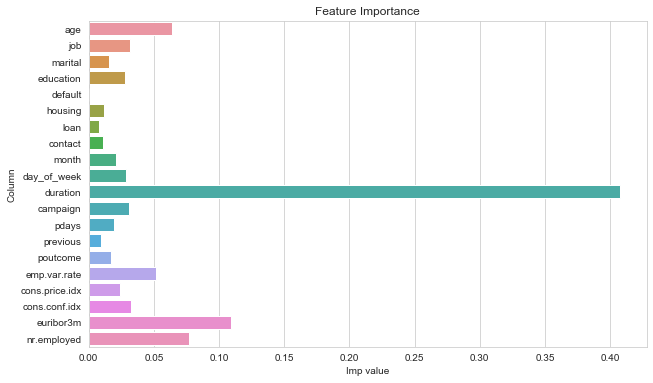

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=sample, x='Imp value', y='Column');

**Removing the least important features**

In [ ]:
df1 = bank_df.drop(["default", "previous", 'poutcome', 'marital', 'housing', 'contact', 'loan'],axis = 1)
# I have onlt removed few columns because I think the rest though are contributing highly 
# are logically significant

In [ ]:
df1

,age,job,education,month,day_of_week,duration,campaign,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,0,6,1,261,1,999,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,3,6,1,149,1,999,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,3,6,1,226,1,999,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,6,1,151,1,999,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,3,6,1,307,1,999,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,5,7,0,334,1,999,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,5,7,0,383,1,999,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,6,7,0,189,2,999,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,5,7,0,442,1,999,-1.1,94.767,-50.8,1.028,4963.6,1


In [ ]:
df1.y.value_counts()

0    36182
1     4593
Name: y, dtype: int64

D) **Handling the imbalances in the data using SMOTE**

- Smote or Synthetic Minority over sampling Technique is used to increase the data points of the minority aspect of the data in order bring about a sense of balance, so that the model may train on both possible outcomes equally.
- We implement only on the Training data
- currently our 0s are a big majority and are severly overpowering the number of 1s in our data, it thus 

In [ ]:
X_new = df1.values[:,0:-1]
y_new = df1.values[:,-1]

E) **Standardizing the Data**

**Scaling the Data**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_new = scaler.fit_transform(X)
print(X)

[[ 1.54031081 -0.18721723 -0.27939528 ...  0.88968392  0.71349024
   0.33203558]
 [ 1.63645129  0.94003951 -0.27939528 ...  0.88968392  0.71349024
   0.33203558]
 [-0.28635834  0.94003951 -0.27939528 ...  0.88968392  0.71349024
   0.33203558]
 ...
 [ 1.54031081  0.37641114 -0.27939528 ... -2.2228832  -1.4942096
  -2.8162065 ]
 [ 0.38662503  1.50366788 -0.27939528 ... -2.2228832  -1.4942096
  -2.8162065 ]
 [ 3.27083947  0.37641114 -0.27939528 ... -2.2228832  -1.4942096
  -2.8162065 ]]


**Performing train-test split**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=0)

**Applying SMOTE**

In [ ]:
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))
  
# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10,k_neighbors=5)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)
  
print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))
  
print("After OverSampling, counts of label '1': ", (sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res == 0)))

Before OverSampling, counts of label '1':  3685
Before OverSampling, counts of label '0':  28935
After OverSampling, the shape of train_X:  (57870, 20)
After OverSampling, the shape of train_y:  (57870,)
After OverSampling, counts of label '1':  28935
After OverSampling, counts of label '0':  28935


### **Q3. Building several Supervised Learning models**

A) **Logistic Regression**

- LR is used for when our dependent variables are discrete or categorical and we have a classification problem
- LR is based off of using the Sigmoid functions, and is derived from that. It is now able to give a final value of either 0 or 1

In [ ]:
# Creating the model object
base_classifier = LogisticRegression()

# Fitting training data to the model
base_classifier.fit(X_train_res,Y_train_res)

# Predicting using the model
Y_pred = base_classifier.predict(X_test)
print(Y_pred)

print("Train Score: ",base_classifier.score(X_train_res,Y_train_res))
print("Test Score: ",base_classifier.score(X_test,Y_test))

[0. 0. 0. ... 0. 0. 0.]
Train Score:  0.8719025401762571
Test Score:  0.8581238503985286


Evaluation for classification:
- We use three metrics for evaluating our classification models
    - 1) Confusion Matrix : tells us how many observations have been correctly and incorrectly missclassifed, and therefor helps us find the type I and type II errors
    - 2) Classification Report: calculates the proportion of correct and misclassifications, through recall(better the recall, lower the errors), precision(how relevant are the predictions, we want this to be high as well), f score is a harmonic average of the two. 
    - 3) Accuracy Score: compares the original values of y, to the predicted ones.


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc_lr = accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc_lr)

[[6196 1051]
 [ 106  802]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91      7247
         1.0       0.43      0.88      0.58       908

    accuracy                           0.86      8155
   macro avg       0.71      0.87      0.75      8155
weighted avg       0.92      0.86      0.88      8155

Accuracy of the model:  0.8581238503985286


**Adjustment of threshold using automation**

* From this we can see that our overall accuracy is pretty good, we compare in detail below, and we now tune the model

In [ ]:
# store the predicted values/probabilities

Y_pred_prob = base_classifier.predict_proba(X_test)
print(Y_pred_prob)

[[0.88817184 0.11182816]
 [0.96080818 0.03919182]
 [0.9823485  0.0176515 ]
 ...
 [0.88761651 0.11238349]
 [0.97332693 0.02667307]
 [0.91526965 0.08473035]]


In [ ]:
for a in np.arange(0.3,0.61,0.01):
    predict_mine = np.where(Y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", round(a,4), ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.3 : 1635  , type 2 error : 40  , type 1 error: 1595
Errors at threshold  0.31 : 1594  , type 2 error : 43  , type 1 error: 1551
Errors at threshold  0.32 : 1557  , type 2 error : 46  , type 1 error: 1511
Errors at threshold  0.33 : 1522  , type 2 error : 48  , type 1 error: 1474
Errors at threshold  0.34 : 1497  , type 2 error : 48  , type 1 error: 1449
Errors at threshold  0.35 : 1468  , type 2 error : 50  , type 1 error: 1418
Errors at threshold  0.36 : 1443  , type 2 error : 55  , type 1 error: 1388
Errors at threshold  0.37 : 1414  , type 2 error : 57  , type 1 error: 1357
Errors at threshold  0.38 : 1385  , type 2 error : 62  , type 1 error: 1323
Errors at threshold  0.39 : 1359  , type 2 error : 65  , type 1 error: 1294
Errors at threshold  0.4 : 1338  , type 2 error : 68  , type 1 error: 1270
Errors at threshold  0.41 : 1316  , type 2 error : 73  , type 1 error: 1243
Errors at threshold  0.42 : 1300  , type 2 error : 74  , type 1 error: 1226
Errors at thre

**Adujustment of threshold**  (0.45)

* We found the optimal threshold to be 0.45 because it can increase the accuracy of class 1 without affecting class 0 as such

In [ ]:
Y_pred_class = []
for value in Y_pred_prob[:,1]:
    if value > 0.45:
        Y_pred_class.append(1)
    else:
        Y_pred_class.append(0)
#print(Y_pred_class)

In [ ]:
# Evaluating the model
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred_class)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred_class))

acc = accuracy_score(Y_test,Y_pred_class)
print("Accuracy of the model: ",acc)

[[6094 1153]
 [  81  827]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.99      0.84      0.91      7247
         1.0       0.42      0.91      0.57       908

    accuracy                           0.85      8155
   macro avg       0.70      0.88      0.74      8155
weighted avg       0.92      0.85      0.87      8155

Accuracy of the model:  0.8486817903126916


* Final LR Performance Matrix

In [ ]:
lr_evaluation = {
    "Type II errors": 81,
    "Total Error": 81 + 1153,
    "Accuracy Score": "84.86"
}

B) **Ada-Boost**

- Ada Boost or adaptive boosting, is an ensemble modeling boosting technique that focuses on increasing the weights misclassified points and reducing the weights of the correctly classified points. this allows the model to train better on the misclasssified data every iteration and become better. 

In [ ]:
# predicting using Adaboost classifier

model_Adaboost = AdaBoostClassifier(base_estimator=
                                    DecisionTreeClassifier(random_state=10),
                                    n_estimators=100,
                                    random_state=10)

#fit the model on the data and predict the values
model_Adaboost.fit(X_train_res,Y_train_res)
Y_pred = model_Adaboost.predict(X_test)

print("Train Score: ",model_Adaboost.score(X_train_res,Y_train_res))
print("Test Score: ",model_Adaboost.score(X_test,Y_test))

Train Score:  1.0
Test Score:  0.8860821581851624


In [ ]:
# Evaluating the model

from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc_ada = accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc_ada)

[[6678  569]
 [ 360  548]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.95      0.92      0.93      7247
         1.0       0.49      0.60      0.54       908

    accuracy                           0.89      8155
   macro avg       0.72      0.76      0.74      8155
weighted avg       0.90      0.89      0.89      8155

Accuracy of the model:  0.8860821581851624


In [ ]:
aboost_evaluation = {
    "Type II errors": 360,
    "Total Error": 569 + 360,
    "Accuracy Score": "88.60"
}

C) **Naive Bayes**

- naive Bayes model is based on the bayes theorem, or the conditional probability. It works best for textual data, and sets up the fooundation for natural language processing and Recurring Neural networks in Deep Learning. 
- here we consider every observation as a separate dimension, it is therefore good for high dimensional data
- we however dont have textual data, and don't have multiple dimensions, so we should not expect high accuracy

In [ ]:
# Predicting using the Naive_Bayes_Classifier

model_NB = GaussianNB()
model_NB.fit(X_train_res,Y_train_res)
Y_pred = model_NB.predict(X_test)

print("Train Score: ",model_NB.score(X_train_res,Y_train_res))
print("Test Score: ",model_NB.score(X_test,Y_test))

Train Score:  0.562035597027821
Test Score:  0.23323114653586757


In [ ]:
# Evaluating the model

from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
print()

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc_NB =accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc_NB)

[[1006 6241]
 [  12  896]]

Classification report: 
              precision    recall  f1-score   support

         0.0       0.99      0.14      0.24      7247
         1.0       0.13      0.99      0.22       908

    accuracy                           0.23      8155
   macro avg       0.56      0.56      0.23      8155
weighted avg       0.89      0.23      0.24      8155

Accuracy of the model:  0.23323114653586757


* As suspected, we have terrible accuracy, good and low type 2 errors, but high type 1 errors. The recall for 1 is great, but very low for 0, and accuracy of 23% is very bad. 

In [ ]:
nb_evaluation = {
    "Type II errors": 12,
    "Total Error": 6241 + 12,
    "Accuracy Score": "23.32%"
}

D) **KNN**

- KNN or K Nearest Neighbhours is an algorthim that works best on noisy data, and not on separable data. here K represents the number of neighbours to consider, N is the similarity distance metric, and the second N is for Neighbours. 
- we have three distance metrics to choose from, we can check accuracy with all (euclidian, minkowski, and Manhattan
- it finds the nearest set of data points around our testing observations, and based on the mode of the K nearest neighbours, decides the final output. 
- Now we build the model and test it

In [ ]:
#predicting using the Kneighbhors classifier
from sklearn.neighbors import KNeighborsClassifier

model_KNN = KNeighborsClassifier(n_neighbors = int(np.sqrt(len(X_train_res))),metric = 'euclidean') 
#we're taking the value of "k" as the square root of the total number of observations in X. 


#fit the model on the data and predict the values
model_KNN.fit(X_train_res, Y_train_res)

Y_pred = model_KNN.predict(X_test)
print(list(zip(Y_test, Y_pred)))

print("Train Score: ",model_KNN.score(X_train_res,Y_train_res))
print("Test Score: ",model_KNN.score(X_test,Y_test))

[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 1.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.

In [ ]:
np.sqrt(len(X_train_res))

240.56184236075347

In [ ]:
#evaluating 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm = confusion_matrix(Y_test, Y_pred)
print(cfm)
print()
print('classification_report:')

print(classification_report(Y_test, Y_pred))
print()
acc = accuracy_score(Y_test, Y_pred)
print('Accuracy of the model:', acc)

[[6068 1179]
 [ 101  807]]

classification_report:
              precision    recall  f1-score   support

         0.0       0.98      0.84      0.90      7247
         1.0       0.41      0.89      0.56       908

    accuracy                           0.84      8155
   macro avg       0.69      0.86      0.73      8155
weighted avg       0.92      0.84      0.87      8155


Accuracy of the model: 0.8430410790925812


* To improve the model, we'll try not using square root, since that value is pretty high at 240, and try trial and error with the following loop, and see what accuracy score is at what value of K

In [ ]:
from sklearn.metrics import accuracy_score
my_dict={}
for K in range(1,10): #checking from 1 to 30
    model_KNN = KNeighborsClassifier(n_neighbors=K,metric="euclidean") #running a normal KNN
    model_KNN.fit(X_train_res, Y_train_res) 
    Y_pred = model_KNN.predict(X_test)
    print ("Accuracy is ", accuracy_score(Y_test,Y_pred), "for K-Value:",K) 
    my_dict[K]=accuracy_score(Y_test,Y_pred) #storing accuracy score as a dictionary with the corresponding K

Accuracy is  0.8772532188841202 for K-Value: 1
Accuracy is  0.8836296750459841 for K-Value: 2
Accuracy is  0.8640098099325567 for K-Value: 3
Accuracy is  0.8711220110361741 for K-Value: 4
Accuracy is  0.8555487431023912 for K-Value: 5
Accuracy is  0.8611894543225015 for K-Value: 6
Accuracy is  0.8468424279583078 for K-Value: 7
Accuracy is  0.8533415082771306 for K-Value: 8
Accuracy is  0.841814837522992 for K-Value: 9


In [ ]:
#to find the best k values
for k in my_dict:
    if my_dict[k] == max(my_dict.values()):
        print(k,":", my_dict[k])

2 : 0.8836296750459841


* As we can see highest accuracy comes when k = 2, but that's too low, so we cam choose 4 as our values, since that is giving us the third best accuracy score, rebuilding the model below with K =4, and we calculate evalution matrix

In [ ]:
# predicting using the Kneighbhors classifier

model_KNN = KNeighborsClassifier(n_neighbors = 4,metric = 'euclidean') 
#taking k = 4, as per our loop 


#fit the model on the data and predict the values
model_KNN.fit(X_train_res, Y_train_res)

Y_pred = model_KNN.predict(X_test)
print(list(zip(Y_test, Y_pred)))

print("Train Score: ",model_KNN.score(X_train_res,Y_train_res))
print("Test Score: ",model_KNN.score(X_test,Y_test))

[(0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.0, 1.0), (0.0, 1.0), (0.0, 0.0), (0.0, 0.0), (1.

In [ ]:
#evaluating 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cfm = confusion_matrix(Y_test, Y_pred)
print(cfm)
print()
print('classification_report:')

print(classification_report(Y_test, Y_pred))
print()
acc = accuracy_score(Y_test, Y_pred)
print('Accuracy of the model:', acc)

[[6477  770]
 [ 281  627]]

classification_report:
              precision    recall  f1-score   support

         0.0       0.96      0.89      0.92      7247
         1.0       0.45      0.69      0.54       908

    accuracy                           0.87      8155
   macro avg       0.70      0.79      0.73      8155
weighted avg       0.90      0.87      0.88      8155


Accuracy of the model: 0.8711220110361741


In [ ]:
knn_evaluation = {
    "Type II errors": 281,
    "Total Error": 770 + 281,
    "Accuracy Score": "87.11%"
}

E) **SVM**

- SVM or support vector Machine is a model best suitable for clearly separabe data, this is because it plots the data onto an n-dimensional space and plots a hyperplane to separate out the classifications of the data. Since we do not have separable data, this is likely not going to give us good accuracy

In [ ]:
svc_model = SVC(kernel="linear",C=3)
svc_model.fit(X_train_res,Y_train_res)
print("Train Score: ",svc_model.score(X_train_res,Y_train_res))
print("Test Score: ",svc_model.score(X_test,Y_test))

Y_pred = svc_model.predict(X_test)
#print(list(Y_pred))

print("Train Score: ",svc_model.score(X_train_res,Y_train_res))
print("Test Score: ",svc_model.score(X_test,Y_test))

Train Score:  0.8753585622947987
Test Score:  0.8469650521152667
Train Score:  0.8753585622947987
Test Score:  0.8469650521152667


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

cfm = confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc_SVM = accuracy_score(Y_test,Y_pred)
print("Accuracy of the model: ",acc_SVM)

[[6081 1166]
 [  82  826]]
Classification report: 
              precision    recall  f1-score   support

         0.0       0.99      0.84      0.91      7247
         1.0       0.41      0.91      0.57       908

    accuracy                           0.85      8155
   macro avg       0.70      0.87      0.74      8155
weighted avg       0.92      0.85      0.87      8155

Accuracy of the model:  0.8469650521152667


In [ ]:
svm_evaluation = {
    "Type II errors": 82,
    "Total Error": 82 + 1166,
    "Accuracy Score": "84.69%"
}

### **Q4. Tabulate the performace metrics of all the above models and tell which model performs better in predicting if the client will subscribe to term deposit or not**

- Using a manual approach to input all values, since there a range of different evaluation matrices used through out the file

In [ ]:
evaluation = pd.DataFrame({ 'Logistic Regression' : pd.Series(lr_evaluation), "Ada Boost" : pd.Series(aboost_evaluation),
                   "Naive Bayes" : pd.Series(nb_evaluation),
                  "KNN" : pd.Series(knn_evaluation), "SVM" : pd.Series(svm_evaluation)})

In [ ]:
evaluation

,Logistic Regression,Ada Boost,Naive Bayes,KNN,SVM
Type II errors,81,360,12,281,82
Total Error,1234,929,6253,1051,1248
Accuracy Score,84.86,88.60,23.32%,87.11%,84.69%


<div class="alert alert-block alert-success">
<h4 style="font-weight: bold">Inference:</h4>
</div>

- Based on the accuracy score, it appears that Ada Boost is the best performing model with an accuracy score of 88.60%. KNN also has a relatively high accuracy score of 87.11%. However, we should also consider the type II error rates, as this metric indicates the percentage of negative instances that are incorrectly classified as positive.

- In this regard, Naive Bayes has the lowest type II error rate, indicating that it may perform well in identifying negative instances correctly but it turns out that it is a model with poor accuracy and also it predicts poorly for class 0.

- Therefore, the best performing models based on the provided evaluation metrics are Ada Boost and KNN. However, we should also consider additional metrics and perform further analysis to make more informed decisions about which model is best suited for the given problem.